In [1]:

%matplotlib notebook
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.pipeline import Pipeline
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [6]:
df = pd.read_csv("nba5.csv",engine="python",names=[i for i in range(99)])
df = df.iloc[:,[i for i in range(15)]]
df=df.drop_duplicates(subset=0)
df = df.iloc[:,[i for i in range(4,15)]]
df.columns = [i for i in range(11)]
df.head()



,0,1,2,3,4,5,6,7,8,9,10
0,28,28,22,27,34,28,22,22,1.24,4.30,215.5
1,23,23,21,25,17,25,37,26,1.75,2.08,215.5
2,25,34,29,30,21,28,32,28,1.33,3.30,212.5
3,18,25,28,29,31,19,26,18,1.95,1.83,213.5
4,32,17,26,24,22,24,26,33,1.29,3.60,215.5


In [19]:
print("TARGETS")
second_half_over = np.where(df.iloc[:,[0,1,4,5]].sum(axis=1) < df.iloc[:,[2,3,6,7]].sum(axis=1),
                            1,0) 
third_q_even = np.where((df.iloc[:,[2,6]].sum(axis=1) % 2) == 0,1,0)
third_q_over1 = np.where(df.iloc[:,[2,6]].sum(axis=1) > df.iloc[:,[0,4]].sum(axis=1),1,0)
lamak = np.where(((df.iloc[:,[0,1]].sum(axis=1) > df.iloc[:,[4,5]].sum(axis=1)) & 
                 (df.iloc[:,[2,3]].sum(axis=1) < df.iloc[:,[6,7]].sum(axis=1))) |
                 ((df.iloc[:,[0,1]].sum(axis=1) < df.iloc[:,[4,5]].sum(axis=1)) & 
                 (df.iloc[:,[2,3]].sum(axis=1) > df.iloc[:,[6,7]].sum(axis=1))),1,0
                 
                )
high_odd = np.where(((df.iloc[:,8] > df.iloc[:,9]) & 
                    (df.iloc[:,[0,1,2,3]].sum(axis=1) > df.iloc[:,[4,5,6,7]].sum(axis=1))) |
                    ((df.iloc[:,8] < df.iloc[:,9]) & 
                    (df.iloc[:,[0,1,2,3]].sum(axis=1) < df.iloc[:,[4,5,6,7]].sum(axis=1))),1,0
                    
                   
                   )

print("TARGETS RATIO ---------")
print("second_half_over",np.unique(second_half_over,return_counts=True)[1][1]
      /df.shape[0])
print("third_q_over1",np.unique(third_q_over1,return_counts=True)[1][1]
      /df.shape[0])
print("lamak",np.unique(lamak,return_counts=True)[1][1]
      /df.shape[0])
print("high_odd",np.unique(high_odd,return_counts=True)[1][1]
      /df.shape[0])

TARGETS
TARGETS RATIO ---------
second_half_over 0.4319852941176471
third_q_over1 0.46875
lamak 0.5036764705882353
high_odd 0.45036764705882354


In [20]:
df1 = df
# df1.iloc[:,8] = df1.iloc[:,8]-df1.iloc[:,9]
# df1 = df1.drop(9,axis=1)
# df1.iloc[:,0] = df1.iloc[:,0] / df1.iloc[:,1]
# df1.iloc[:,4] = df1.iloc[:,4] / df1.iloc[:,5]
#df1 = df1.drop([1,2,3,5,6,7],axis=1)
df1 = df1.drop([2,3,6,7],axis=1)
df1.head()



,0,1,4,5,8,9,10
0,28,28,34,28,1.24,4.30,215.5
1,23,23,17,25,1.75,2.08,215.5
2,25,34,21,28,1.33,3.30,212.5
3,18,25,31,19,1.95,1.83,213.5
4,32,17,22,24,1.29,3.60,215.5


In [21]:
X_train,X_test,y_train,y_test=train_test_split(df1,high_odd,test_size=0.25,
                                               stratify=high_odd)


In [22]:
test_tree=RandomForestClassifier(n_estimators=400)
test_tree.fit(X_train,y_train)
test_tree.feature_importances_

array([0.14539797, 0.13633304, 0.13409559, 0.12688067, 0.16506658,
       0.16383861, 0.12838755])

In [23]:
sc=StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
test_pca = PCA()
test_pca.fit(X_train_std)
nvar = test_pca.explained_variance_ratio_
nvar = list(nvar)
nvar.sort(reverse=True)
for i in range(1,len(nvar)+1):
	print(sum(nvar[:i]))

0.2059071734290552
0.39805558440926303
0.542358402745992
0.6727009700552185
0.7970059521609563
0.9107737798292088
0.9999999999999999


c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


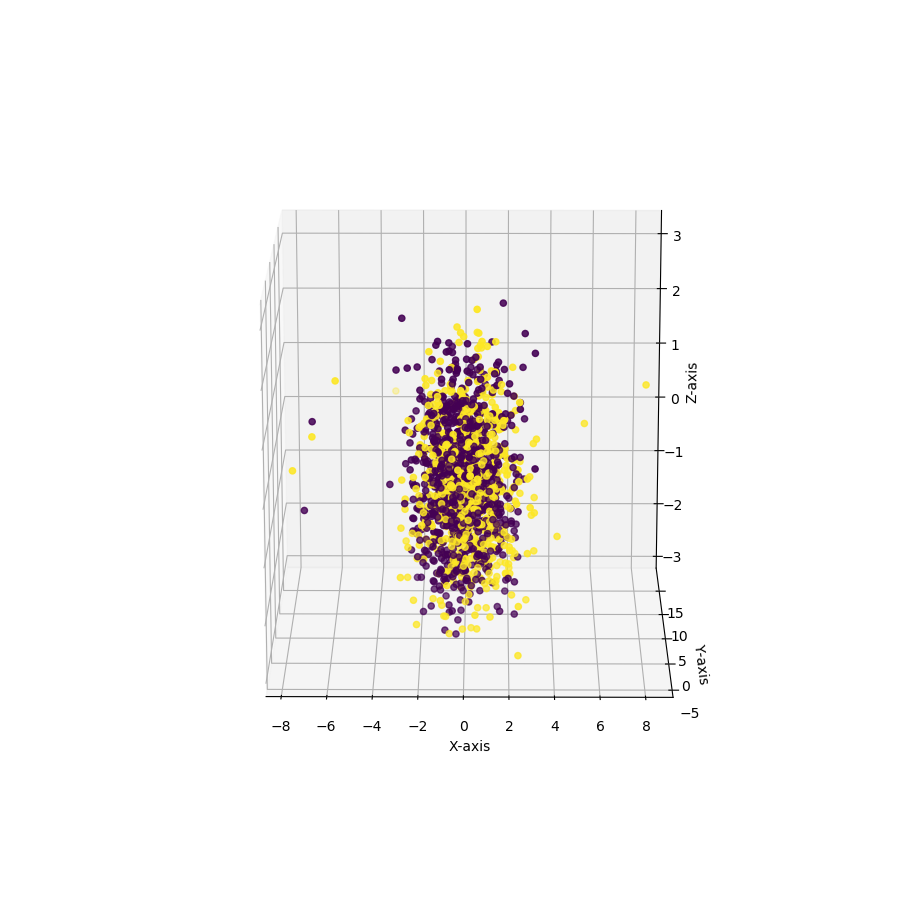

In [24]:
pca_3d = PCA(n_components=3,random_state=1)
X_train_std_pca3d = pca_3d.fit_transform(X_train_std)
X_test_std_pca3d = pca_3d.transform(X_test_std)

xplt = X_train_std_pca3d
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

<IPython.core.display.Javascript object>


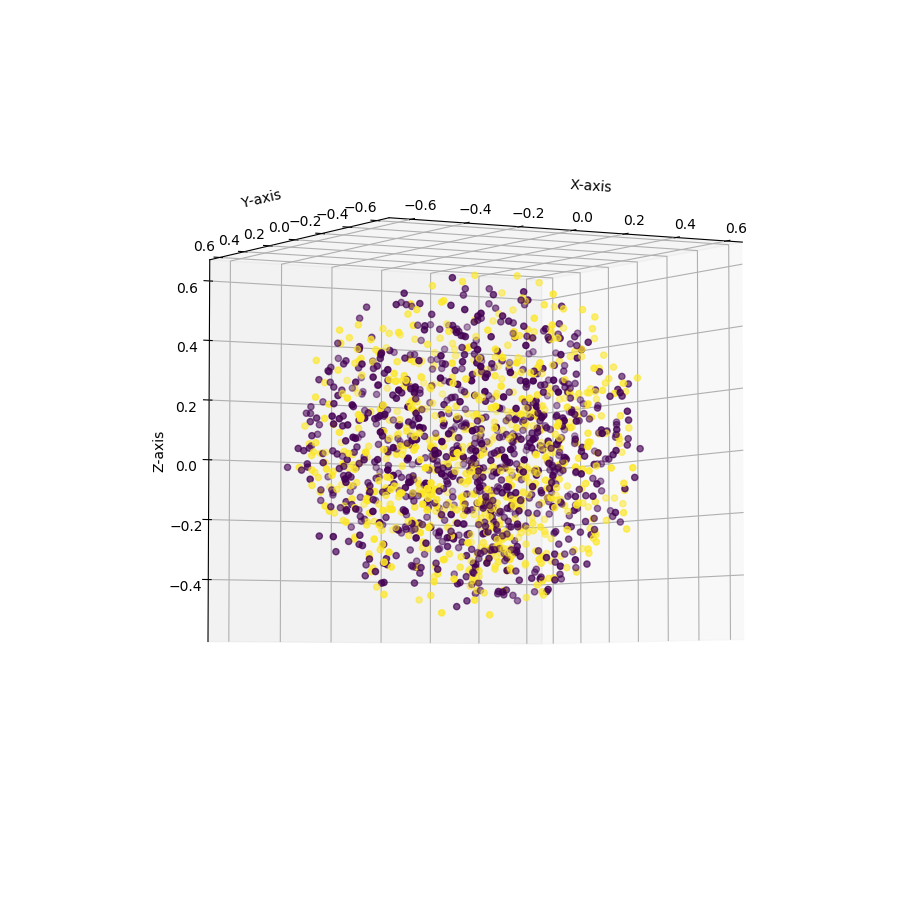

In [25]:
kpca_3d_sig = KernelPCA(kernel="rbf",n_components=3,random_state=2)
X_train_std_kpca3d = kpca_3d_sig.fit_transform(X_train_std)
X_test_std_kpca3d = kpca_3d_sig.transform(X_test_std)


xplt = X_train_std_kpca3d
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xplt[:,0],xplt[:,1],xplt[:,2],c=y_train)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()

In [31]:
from keras import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [28]:
minmax = MinMaxScaler(feature_range=(0,1))
X_train_sc = minmax.fit_transform(X_train)
X_train_sc.shape

c:\users\wojcz\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(1632, 7)

In [33]:
model = Sequential()
model.add(Dense(50, activation='elu', input_dim=7))
model.add(Dense(14, activation='elu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_sc,y_train,batch_size=60,epochs=50,
          verbose=2,validation_split=0.1,
          callbacks=[EarlyStopping(patience=20,restore_best_weights=True,monitor='val_acc')])

Train on 1468 samples, validate on 164 samples
Epoch 1/50
 - 8s - loss: 0.6917 - acc: 0.5477 - val_loss: 0.6615 - val_acc: 0.5671
Epoch 2/50
 - 8s - loss: 0.6794 - acc: 0.5422 - val_loss: 0.6594 - val_acc: 0.5793
Epoch 3/50
 - 8s - loss: 0.6746 - acc: 0.5565 - val_loss: 0.6572 - val_acc: 0.5793
Epoch 4/50
 - 8s - loss: 0.6732 - acc: 0.5783 - val_loss: 0.6488 - val_acc: 0.5915
Epoch 5/50
 - 8s - loss: 0.6684 - acc: 0.5620 - val_loss: 0.6456 - val_acc: 0.5671
Epoch 6/50
 - 8s - loss: 0.6639 - acc: 0.5695 - val_loss: 0.6495 - val_acc: 0.5549
Epoch 7/50
 - 8s - loss: 0.6636 - acc: 0.5579 - val_loss: 0.6390 - val_acc: 0.5793
Epoch 8/50
 - 8s - loss: 0.6537 - acc: 0.5606 - val_loss: 0.6214 - val_acc: 0.5854
Epoch 9/50
 - 8s - loss: 0.6454 - acc: 0.5831 - val_loss: 0.6195 - val_acc: 0.6159
Epoch 10/50
 - 8s - loss: 0.6272 - acc: 0.6213 - val_loss: 0.5976 - val_acc: 0.6220
Epoch 11/50
 - 8s - loss: 0.6092 - acc: 0.6410 - val_loss: 0.5809 - val_acc: 0.7012
Epoch 12/50
 - 8s - loss: 0.5965 - acc

In [48]:
X_test_sc = minmax.transform(X_test)
preds = model.predict(X_test_sc)
print(precision_score(y_test,(preds > 0.6)))
print(np.unique((preds > 0.6),return_counts=True))


0.7900552486187845
(array([False,  True]), array([363, 181]))


In [49]:
model.save("nba_highOdd.h5")